In [1]:
import tensorflow as tf

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = 'mnist.npz'
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data(path)

In [4]:
print("Total training images:", len(X_train))
print("Total testing images:", len(X_test))

Total training images: 60000
Total testing images: 10000


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),

    tf.keras.layers.Conv2D(10, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=(2,2)),

#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),

#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 10)          1510      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 120)               1

In [9]:
history = model.fit(
    X_train,Y_train,
    epochs=20,
    validation_data=(X_test,Y_test)
)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3966 - accuracy: 0.9103 - val_loss: 0.0964 - val_accuracy: 0.9692
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0957 - accuracy: 0.9711 - val_loss: 0.0839 - val_accuracy: 0.9721
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0729 - accuracy: 0.9777 - val_loss: 0.0786 - val_accuracy: 0.9765
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0777 - val_accuracy: 0.9765
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0539 - accuracy: 0.9840 - val_loss: 0.0695 - val_accuracy: 0.9808
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0487 - accuracy: 0.9855 - val_loss: 0.0590 - val_accuracy: 0.9834
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0794 - val_accuracy:

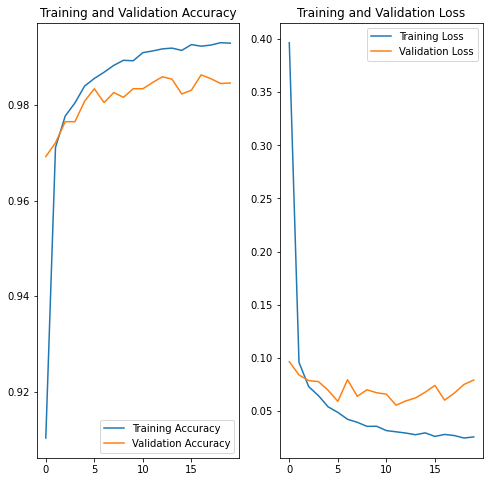

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()